In [18]:
using BenchmarkTools
using LinearAlgebra          ### Linear algebra library
using Plots                  ### Library to make plots
using DifferentialEquations  ### Library to use differential equations
using Tullio                 ### Library to work with tensors
using Base.Threads           ### Function to check the number of threads 
using DelimitedFiles         ### Manipulate files 
using LaTeXStrings           ### Latex strings
using StaticArrays
using Serialization

using DelimitedFiles
using PyPlot
using PyCall
using IJulia

# PIC 1

In [67]:
name="PIC_1"

"PIC_1"

In [68]:
cspins_f = readdlm("./TD/data/cspins_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ') ;
#rkvec_f = readdlm("./data/rkvec_jl.txt", ',' ,Complex{Float64} ) ;
sneq_f = readdlm("./TD/data/sneq_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ')
sc_f = readdlm("./TD/data/sc_$(name)_jl.txt" , ' ')
cc_f = readdlm("./TD/data/cc_$(name)_jl.txt" , ' ') ;

In [21]:
PyPlot.rc("font", family="Times New Roman")

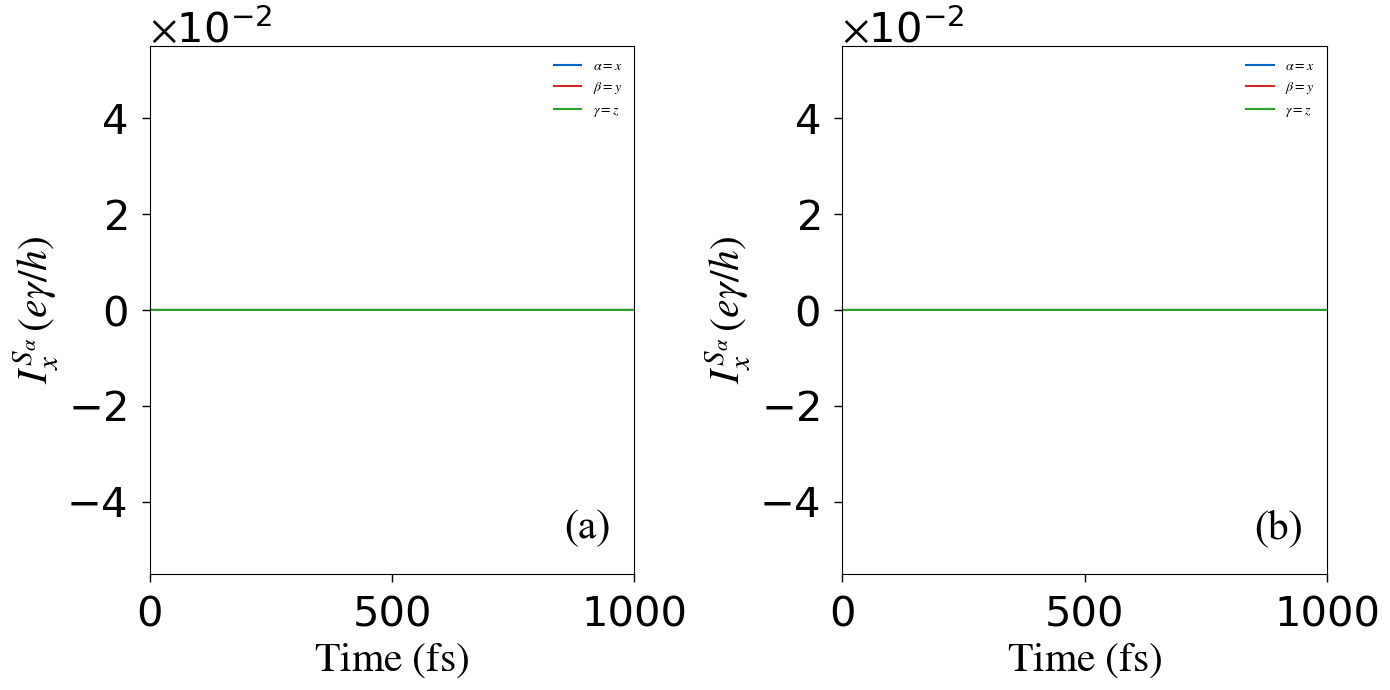

In [69]:
using PyPlot, PyCall

# Suppress font warnings 
logging = pyimport("logging")
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

# Use .ttf path directly
fm = pyimport("matplotlib.font_manager")
FontProperties = fm.FontProperties
times = FontProperties(fname="/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf")

# Data
x  = sc_f[:,1]
y1 = sc_f[:,4]
y2 = sc_f[:,2]
y3 = sc_f[:,3]

fs = 30

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
ax1, ax2 = axs

# --- ax1 ---
ax1.plot(x, y1, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax1.plot(x, y2, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax1.plot(x, y3, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

# xLIM
ax1.set_xlim(0, 1000)

ax1.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax1.set_ylabel(raw"$I^{S_\alpha}_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax1.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax1.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax1.yaxis.offsetText.set_fontsize(fs)

ax1.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax1.text(0.95, 0.05, "(a)",
         transform=ax1.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")

# --- ax2 ---
ax2.plot(x, y1, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax2.plot(x, y2, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax2.plot(x, y3, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

ax2.set_xlim(0, 1000)
ax2.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax2.set_ylabel(raw"$I^{S_\alpha}_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax2.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax2.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax2.yaxis.offsetText.set_fontsize(fs)

ax2.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax2.text(0.95, 0.05, "(b)",
         transform=ax2.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")

fig.tight_layout()
display(fig)


# PIC 2

In [70]:
name="PIC_2"

"PIC_2"

In [71]:
cspins_f = readdlm("./TD/data/cspins_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ') ;
#rkvec_f = readdlm("./data/rkvec_jl.txt", ',' ,Complex{Float64} ) ;
sneq_f = readdlm("./TD/data/sneq_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ')
sc_f = readdlm("./TD/data/sc_$(name)_jl.txt" , ' ')
cc_f = readdlm("./TD/data/cc_$(name)_jl.txt" , ' ') ;

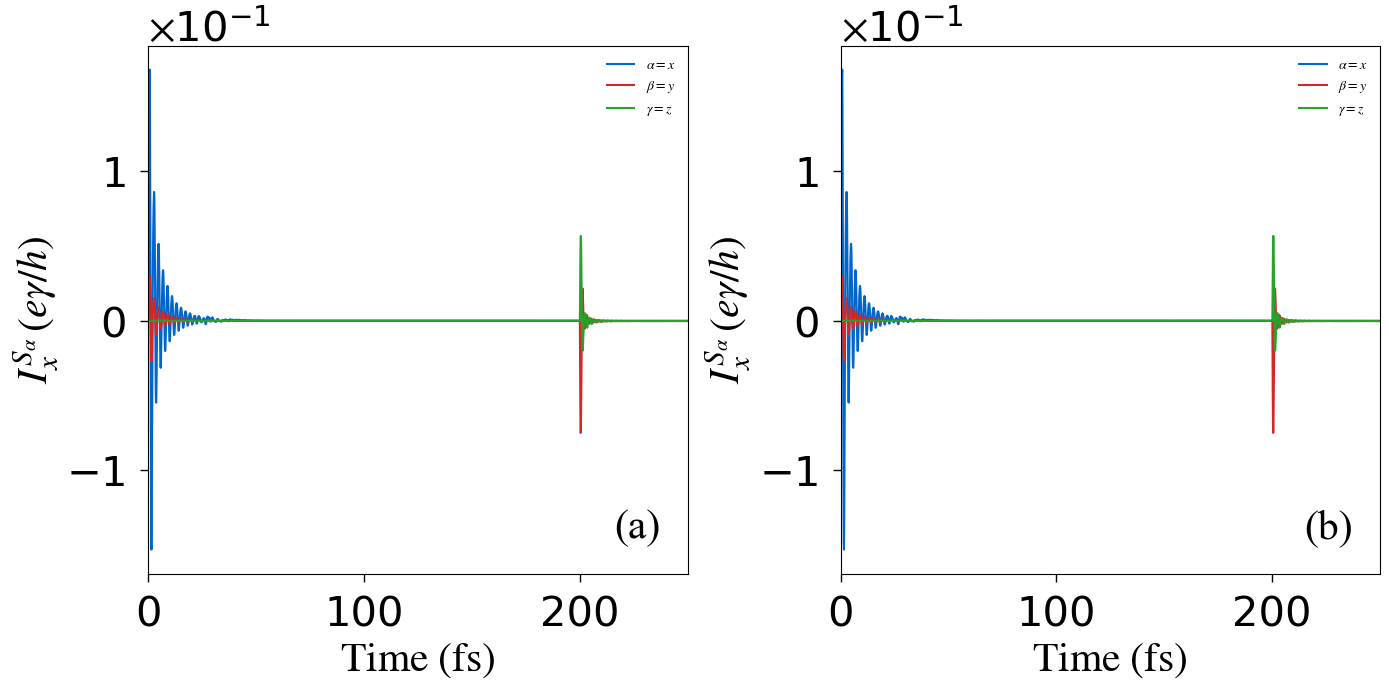

In [74]:
using PyPlot, PyCall

# Suppress font warnings 
logging = pyimport("logging")
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

# Use .ttf path directly
fm = pyimport("matplotlib.font_manager")
FontProperties = fm.FontProperties
times = FontProperties(fname="/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf")

# Data
x  = sc_f[:,1]
y1 = sc_f[:,4]
y2 = sc_f[:,2]
y3 = sc_f[:,3]

fs = 30
xlim = 250

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
ax1, ax2 = axs

# --- ax1 ---
ax1.plot(x, y1, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax1.plot(x, y2, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax1.plot(x, y3, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

ax1.set_xlim(0, xlim)
ax1.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax1.set_ylabel(raw"$I^{S_\alpha}_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax1.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax1.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax1.yaxis.offsetText.set_fontsize(fs)

ax1.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax1.text(0.95, 0.05, "(a)",
         transform=ax1.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")

# --- ax2 ---
ax2.plot(x, y1, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax2.plot(x, y2, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax2.plot(x, y3, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

ax2.set_xlim(0, xlim)
ax2.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax2.set_ylabel(raw"$I^{S_\alpha}_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax2.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax2.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax2.yaxis.offsetText.set_fontsize(fs)

ax2.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax2.text(0.95, 0.05, "(b)",
         transform=ax2.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")

fig.tight_layout()
display(fig)

# PIC 3

In [81]:
name="PIC_3"

"PIC_3"

In [82]:
cspins_f = readdlm("./TD/data/cspins_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ') ;
#rkvec_f = readdlm("./data/rkvec_jl.txt", ',' ,Complex{Float64} ) ;
sneq_f = readdlm("./TD/data/sneq_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ')
sc_f = readdlm("./TD/data/sc_$(name)_jl.txt" , ' ')
cc_f = readdlm("./TD/data/cc_$(name)_jl.txt" , ' ') ;

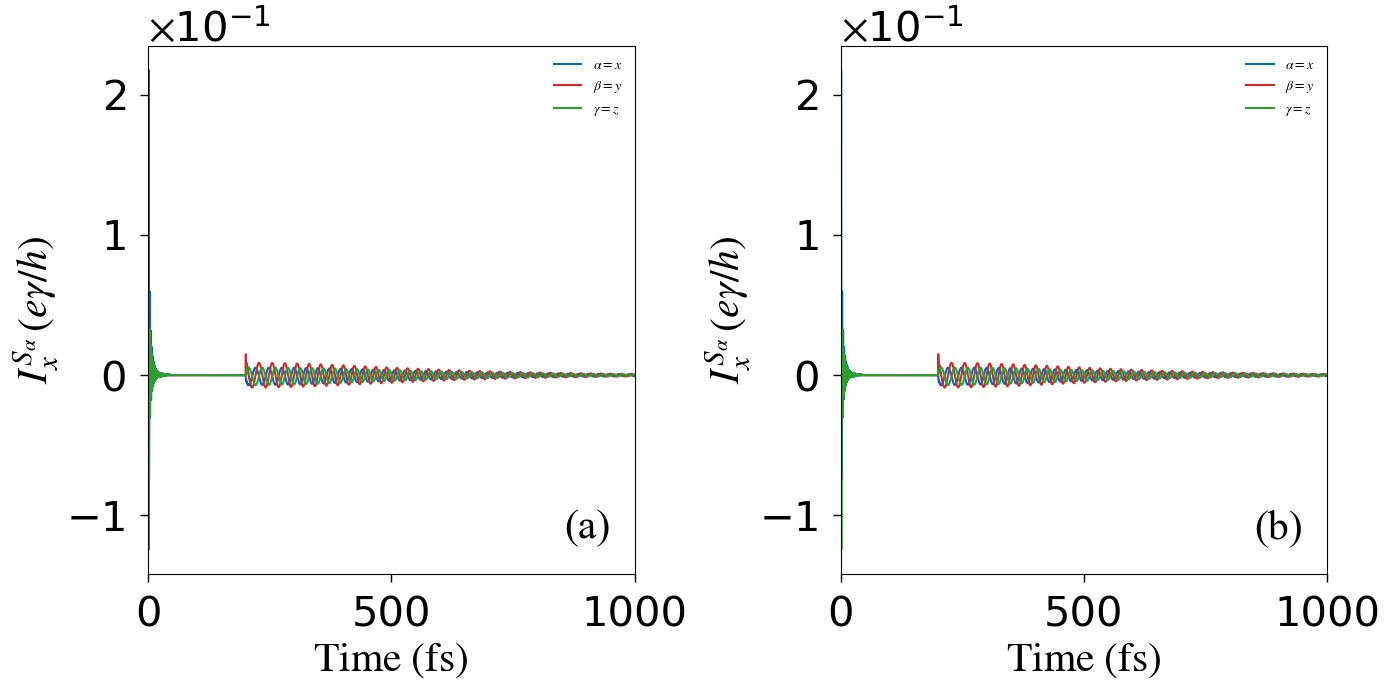

In [83]:
using PyPlot, PyCall

# Suppress font warnings 
logging = pyimport("logging")
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

# Use .ttf path directly
fm = pyimport("matplotlib.font_manager")
FontProperties = fm.FontProperties
times = FontProperties(fname="/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf")

# Data
x  = sc_f[:,1]
y1 = sc_f[:,4]
y2 = sc_f[:,2]
y3 = sc_f[:,3]

fs = 30
xlim = 1000

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
ax1, ax2 = axs

# --- ax1 ---
ax1.plot(x, y1, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax1.plot(x, y2, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax1.plot(x, y3, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

ax1.set_xlim(0, xlim)
ax1.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax1.set_ylabel(raw"$I^{S_\alpha}_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax1.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax1.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax1.yaxis.offsetText.set_fontsize(fs)

ax1.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax1.text(0.95, 0.05, "(a)",
         transform=ax1.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")

# --- ax2 ---
ax2.plot(x, y1, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax2.plot(x, y2, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax2.plot(x, y3, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

ax2.set_xlim(0, xlim)
ax2.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax2.set_ylabel(raw"$I^{S_\alpha}_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax2.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax2.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax2.yaxis.offsetText.set_fontsize(fs)

ax2.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax2.text(0.95, 0.05, "(b)",
         transform=ax2.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")

fig.tight_layout()
display(fig)


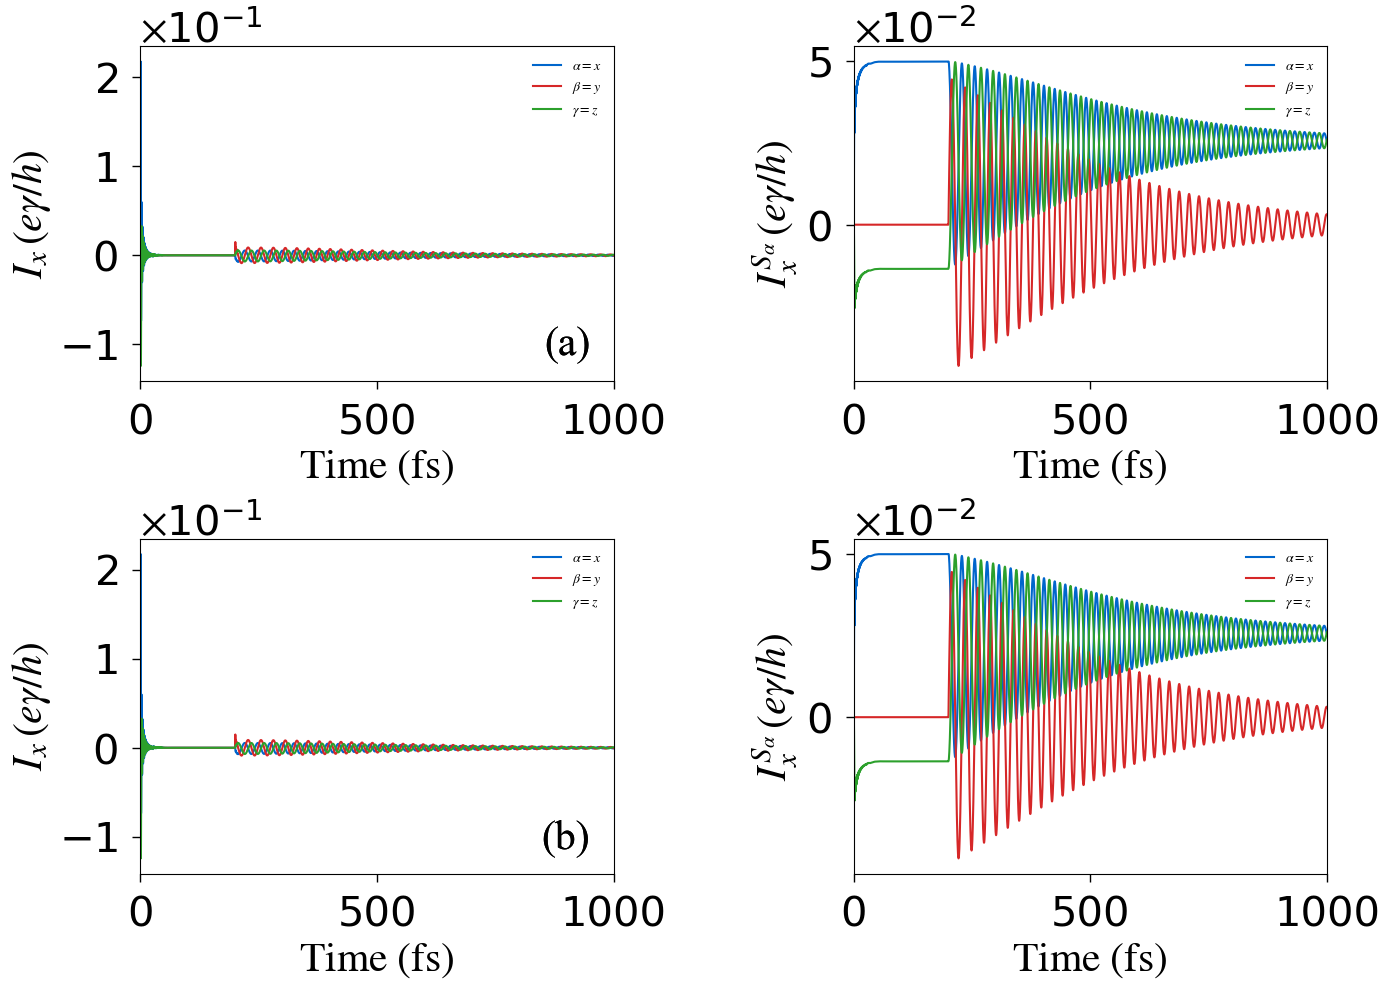

In [85]:
using PyPlot, PyCall

# Suppress font warnings 
logging = pyimport("logging")
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

# Use .ttf path directly
fm = pyimport("matplotlib.font_manager")
FontProperties = fm.FontProperties
times = FontProperties(fname="/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf")

# Data
x  = sc_f[:,1]
y11 = sc_f[:,4]
y12 = sc_f[:,2]
y13 = sc_f[:,3]

y31 = sneq_f[:,4]
y32 = sneq_f[:,2]
y33 = sneq_f[:,3]
fs = 30
xlim = 1000

# Create a 2×2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axs[:]   # flatten into a 4‐element vector

# --- ax1 --- a
ax1.plot(x, y11, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax1.plot(x, y12, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax1.plot(x, y13, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

ax1.set_xlim(0, xlim)
ax1.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax1.set_ylabel(raw"$I_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax1.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax1.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax1.yaxis.offsetText.set_fontsize(fs)

ax1.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax1.text(0.95, 0.05, "(a)",
         transform=ax1.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")

# --- ax2 --- b
ax2.plot(x, y11, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax2.plot(x, y12, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax2.plot(x, y13, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

ax2.set_xlim(0, xlim)
ax2.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax2.set_ylabel(raw"$I_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax2.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax2.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax2.yaxis.offsetText.set_fontsize(fs)

ax2.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax2.text(0.95, 0.05, "(b)",
         transform=ax2.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")


# --- ax3 --- c
ax3.plot(x, y31, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax3.plot(x, y32, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax3.plot(x, y33, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

ax3.set_xlim(0, xlim)
ax3.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax3.set_ylabel(raw"$I^{S_\alpha}_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax3.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax3.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax3.yaxis.offsetText.set_fontsize(fs)

ax3.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax3.text(0.95, 0.05, "(a)",
         transform=ax1.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")

# --- ax4 --- d
ax4.plot(x, y31, label=raw"$\alpha = x$", linewidth=1.5, color="#0066cc")  # blue
ax4.plot(x, y32, label=raw"$\beta = y$", linewidth=1.5, color="#d62728")   # red
ax4.plot(x, y33, label=raw"$\gamma = z$", linewidth=1.5, color="#2ca02c")  # green

ax4.set_xlim(0, xlim)
ax4.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs, fontproperties=times)
ax4.set_ylabel(raw"$I^{S_\alpha}_x\,(e\gamma/h)$", fontsize=fs, fontproperties=times)

ax4.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax4.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax4.yaxis.offsetText.set_fontsize(fs)

ax4.legend(frameon=false, fontsize=fs-8, loc="upper right", prop=times)
ax4.text(0.95, 0.05, "(b)",
         transform=ax2.transAxes,
         fontsize=fs,
         fontproperties=times,
         ha="right", va="bottom")         






fig.tight_layout()
display(fig)


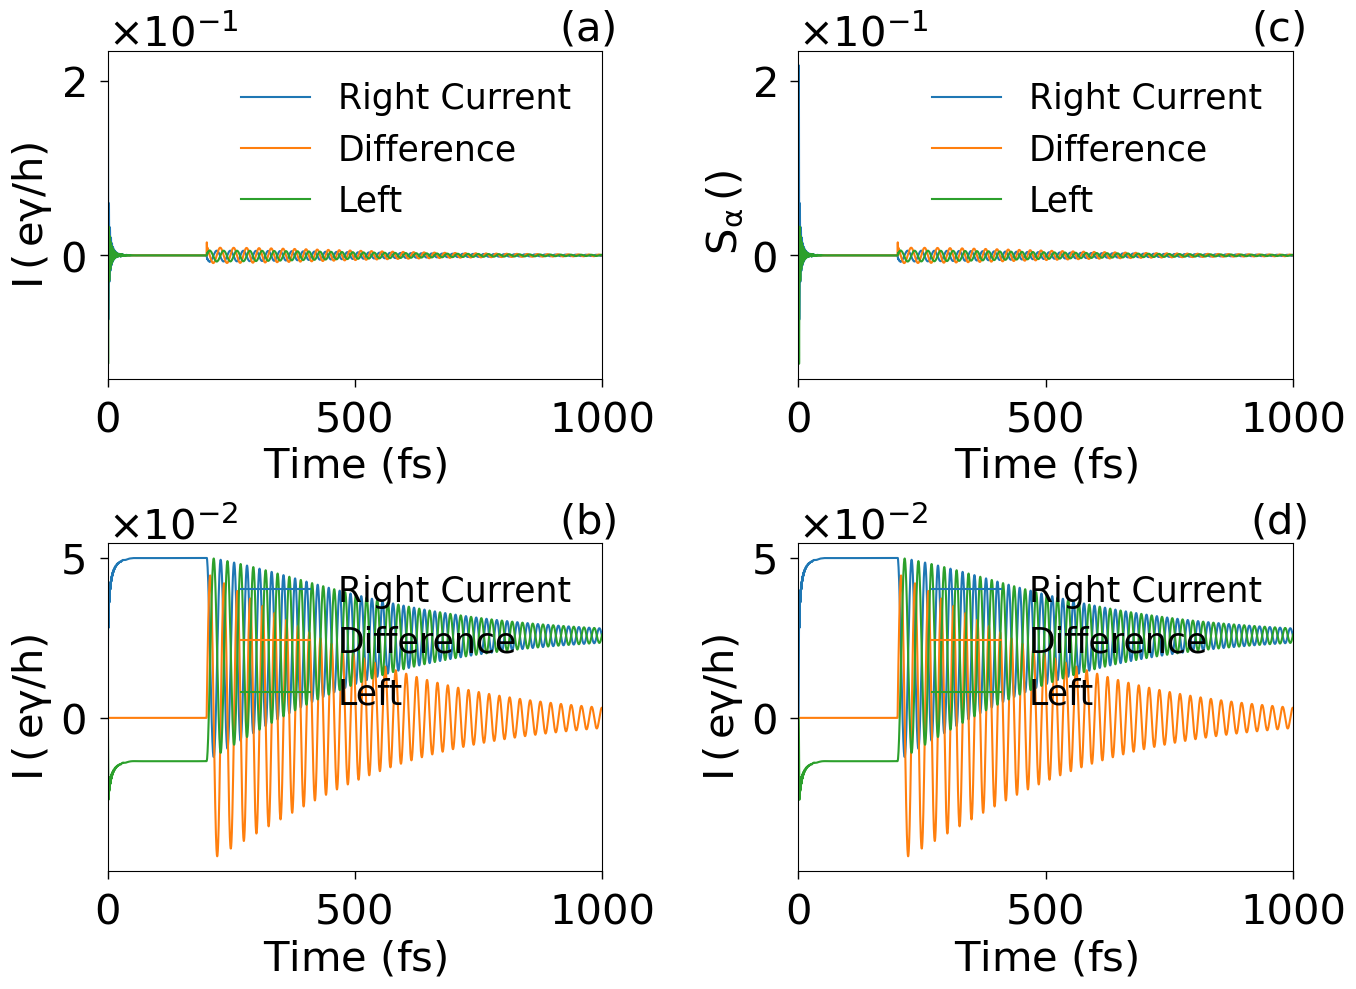

In [38]:
using DelimitedFiles
using PyPlot
using PyCall
using IJulia

# your data
x  = sc_f[:,1]
y11 = sc_f[:,4]
y12 = sc_f[:,2]
y13 = sc_f[:,3]

y31 = sneq_f[:,4]
y32 = sneq_f[:,2]
y33 = sneq_f[:,3]

fs = 30

# Create a 2×2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axs[:]   # flatten into a 4‐element vector

# --- subplot (a) ---
ax1.plot(x, y11, label="Right Current", linewidth=1.5)
ax1.plot(x, y12, label="Difference",     linewidth=1.5)
ax1.plot(x, y13, label="Left",           linewidth=1.5)
ax1.set_xlim(0, 1000)
ax1.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax1.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax1.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax1.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax1.yaxis.offsetText.set_fontsize(fs)
ax1.text(0.97, 1.03, raw"$\rm{(a)}$",
         fontsize=fs, ha="center",
         transform=ax1.transAxes)
ax1.legend(frameon=false, fontsize=fs-5, loc="upper right")


# --- subplot (b) ---
ax2.plot(x, y31, label="Right Current", linewidth=1.5)
ax2.plot(x, y32, label="Difference",     linewidth=1.5)
ax2.plot(x, y33, label="Left",           linewidth=1.5)
ax2.set_xlim(0, 1000)
ax2.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax3.set_ylabel(raw"$\mathrm{\,S_\alpha \,()}$", fontsize=fs)
ax2.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax2.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax2.yaxis.offsetText.set_fontsize(fs)
ax2.text(0.97, 1.03, raw"$\rm{(b)}$",
         fontsize=fs, ha="center",
         transform=ax2.transAxes)
ax2.legend(frameon=false, fontsize=fs-5, loc="upper right")


# --- subplot (c) ---
ax3.plot(x, y11, label="Right Current", linewidth=1.5)
ax3.plot(x, y12, label="Difference",     linewidth=1.5)
ax3.plot(x, y13, label="Left",           linewidth=1.5)
ax3.set_xlim(0, 1000)
ax3.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax2.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax3.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax3.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax3.yaxis.offsetText.set_fontsize(fs)
ax3.text(0.97, 1.03, raw"$\rm{(c)}$",
         fontsize=fs, ha="center",
         transform=ax3.transAxes)
ax3.legend(frameon=false, fontsize=fs-5, loc="upper right")


# --- subplot (d) ---
ax4.plot(x, y31, label="Right Current", linewidth=1.5)
ax4.plot(x, y32, label="Difference",     linewidth=1.5)
ax4.plot(x, y33, label="Left",           linewidth=1.5)
ax4.set_xlim(0, 1000)
ax4.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax4.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax4.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax4.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax4.yaxis.offsetText.set_fontsize(fs)
ax4.text(0.97, 1.03, raw"$\rm{(d)}$",
         fontsize=fs, ha="center",
         transform=ax4.transAxes)
ax4.legend(frameon=false, fontsize=fs-5, loc="upper right")


fig.tight_layout()
display(fig)
